In [104]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score

In [105]:
lista_attr = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        line.strip()
        initia = line.find('[')
        lista_list = [float(x) for x in line[initia + 1: -2].split(', ')]
        lista_attr.append(lista_list)


In [106]:
X = np.array(lista_attr)
pca = PCA(n_components = 50)
X_new = pca.fit_transform(X) 

In [107]:
print(pca.explained_variance_ratio_)
print(X_new.shape)
print(X_new)

[ 0.09677511  0.05886284  0.04549392  0.0336914   0.02658878  0.02501407
  0.02369812  0.02124501  0.01907082  0.01629285  0.01416668  0.01343007
  0.01297935  0.01197357  0.01121607  0.01039287  0.0093623   0.00887111
  0.00817023  0.00741812  0.00722397  0.00699888  0.00679285  0.0063146
  0.00619671  0.00586309  0.0056263   0.00529969  0.00510283  0.00481783
  0.00443302  0.0043845   0.00436359  0.00398332  0.00382847  0.0037265
  0.00355221  0.00351079  0.00331277  0.00327739  0.00317344  0.00308491
  0.0030109   0.00291335  0.0028372   0.00272685  0.00261848  0.00258517
  0.00255683  0.00250815]
(4214, 50)
[[ 107.86096449 -106.96748849  173.17571537 ...,   -1.57462484
   -58.68900189  -29.80629595]
 [ -20.16786548   56.97777189 -142.40258096 ...,  -26.44234506
     3.17551877    6.64261341]
 [ 230.29590346 -136.36689034  110.9021059  ...,   -1.49599383
   -12.57647764  -17.1436942 ]
 ..., 
 [  32.55423293  -24.75614384  -77.32635939 ...,  -13.45633911
    -9.84846251    8.33369148

In [108]:
X_backup = X_new

In [109]:
db = DBSCAN(eps = 100, min_samples = 4).fit(X_new)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 3


In [110]:
#KMeans
k1 = 10
k2 = 20
k3 = 30
klist = [k1,k2,k3]
labels = []
centroids = []
silavg = []
for k in klist :
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_new)
    cluster_labels = kmeans.labels_
    labels += [cluster_labels]
    centroids += [kmeans.cluster_centers_]
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    silavg += [silhouette_avg]
print(silavg)
#Silhoutte Score 

[0.05161874012429242, 0.053991074101636533, 0.058072369939577886]


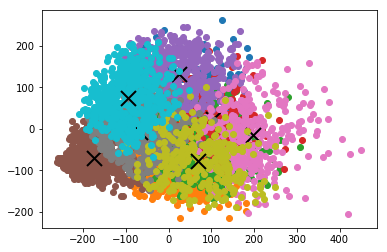

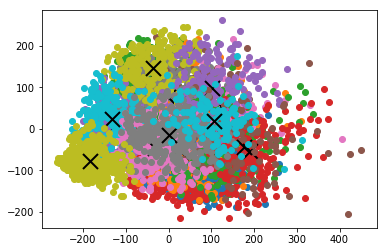

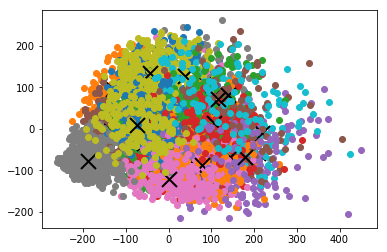

In [111]:
#Plot de cada K
n = 0
for k in klist :
    for i in range(k):
        # select only data observations with cluster label == i
        ds = X_new[np.where(labels[n]==i)]
        # plot the data observations
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[n][i,0],centroids[n][i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    n += 1
    pyplot.show()

In [112]:
for cen in labels:
    c = 0
    for cent in cen:
        c+=1
    print(c)
print(labels)
print(centroids)

4214
4214
4214
[array([2, 0, 2, ..., 1, 0, 0], dtype=int32), array([12,  5, 15, ..., 11,  5,  5], dtype=int32), array([15,  6, 24, ..., 12, 12, 12], dtype=int32)]
[array([[  5.57183100e+01,   6.96281169e+01,  -1.26519397e+02,
          5.89407073e+01,  -3.17493836e+01,  -2.42123895e+01,
         -9.77714452e+00,  -6.25363217e+01,  -3.01904933e+01,
          2.95900641e-01,  -7.20981779e+00,  -6.74066889e+00,
          1.72153204e+00,  -8.18223291e+00,   1.06230850e+01,
          4.56487226e+00,   7.45635905e+00,  -2.28948058e+00,
          3.21641369e+00,   4.28923189e+00,   8.48665384e+00,
          4.06154760e+00,  -1.77802271e+00,  -1.36006330e+01,
          5.02934183e-02,   1.02270788e+00,  -8.83858861e+00,
         -2.24475057e+00,  -6.41290733e-01,   1.96364481e+00,
          4.34338147e-01,   8.70247590e+00,  -5.05814034e+00,
          5.93077438e+00,   1.18086664e+00,  -3.80298116e+00,
          3.88570119e+00,  -5.79808367e+00,   9.98033904e+00,
          3.18219203e+00,  -3.

In [179]:
#MeanShift
bandwidth = estimate_bandwidth(X_new)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_new)
labels_ms = ms.labels_
cluster_centers_ms = ms.cluster_centers_
n_clusters_ = labels_ms.max()+1
print(n_clusters_)
print(labels_ms)
print(bandwidth)

10
[0 0 0 ..., 0 0 0]
369.425774145


In [180]:
silhouette_avg = silhouette_score(X_new, labels_ms)
print(silhouette_avg)

0.217964819381


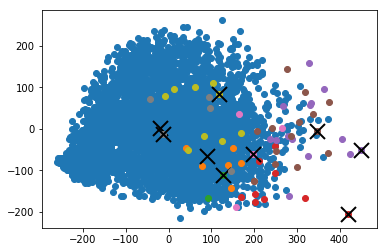

In [188]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_new[np.where(labels_ms==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(cluster_centers_ms[i,0],cluster_centers_ms[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()